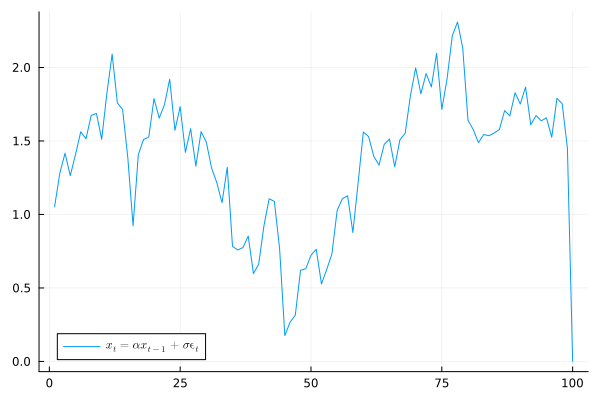

In [1]:
## Lecture 2: Question 8
##
using Plots, LaTeXStrings
x_0 = 1.0
T = 100
ϵ = randn(T)
x = zeros(T)
x_T = 0.0
α = 1.0
σ = 0.2

for t in 1:T
    if t == 1
        x[t] = α * x_0 + σ * ϵ[t]
    elseif t < T
        x[t] = α * x[t-1] + σ * ϵ[t]
    else
        x[t] = x_T
    end
end

plot(x, label = L"x_t = α x_{t-1} + σ ϵ_t")

## Atkinson Index used to measure inequality
$$A_{\epsilon} = 
\begin{cases}
1- \frac{ (\frac{1}{n} \sum x_i^{1-\epsilon} )}{ \frac{1}{n} \sum x_i } & \epsilon \neq 1 \\
1 - \frac{ ( \prod x_i)^{\frac{1}{n}}}{ \frac{1}{n} \sum x_i} & \epsilon = 1
\end{cases}$$
### Code to generate an Atkinson Index:

val = 69.30003070970531
num = 0.4802494256366099
val = 50.51994029190512
den = 0.5051994029190512
A = 0.950613604968098


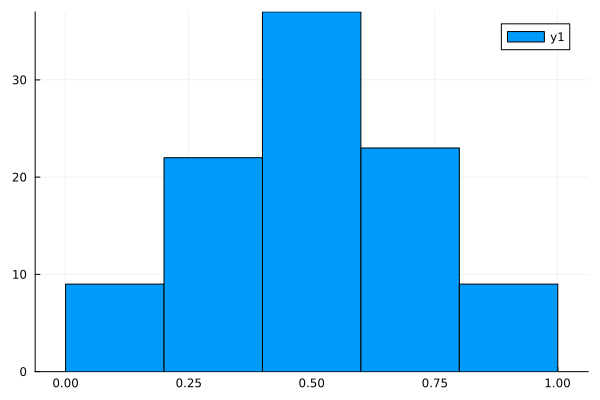

In [39]:
using LaTeXStrings, Plots, Statistics, LinearAlgebra, Distributions 

n = 100 ## Population size
#distribution = Chisq(3) ## Distribution of incomes
distribution = LogitNormal() ## Distribution of income
x = rand(distribution, n) ## Vector of incomes
ϵ = 0.5 ## Inequality aversion parameter
val = 0.0 ## Initialise val

for i in 1:n
    if i == 1
        val = x[i]^(1-ϵ)
    else
    val += x[i]^(1-ϵ)
    end
end

@show val

num = (1/n*val)^(1/(1-ϵ))

@show num

for i in 1:n
    if i == 1
        val = x[i]
    else
        val += x[i]
    end
end

@show val

den = 1/n*val

@show den

A = num/den

@show A

histogram(x)
